In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /Volumes/Additional Drive/Projects/Logistic-Regression/Spam_finalData.csv
100%|██████████████████████████████████████| 1.64M/1.64M [00:00<00:00, 6.61MB/s]


In [10]:
df = pd.read_csv("Spam_finalData.csv")
df.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [11]:
df.shape

(5171, 16)

In [16]:
X = df.drop(['label_num'], axis=1)
y = df['label_num']

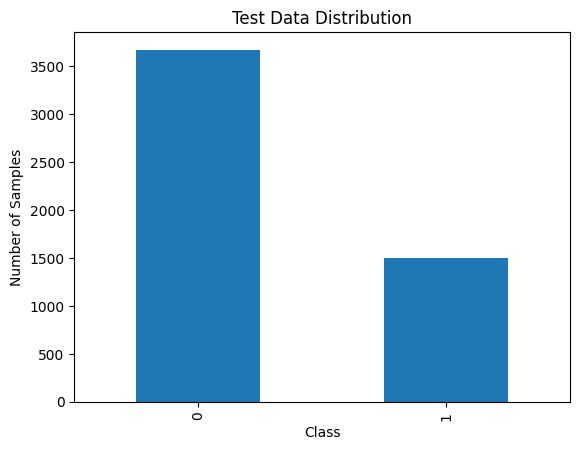

In [21]:
y.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [22]:
y.value_counts(normalize = True)

label_num
0    0.710114
1    0.289886
Name: proportion, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
print('Model Accuracy:', model.score(X_test,y_test))

Model Accuracy: 0.9350348027842227


In [43]:
# Imbalance => should not use accuracy.

In [30]:
# test data
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 1, 0, 1])

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[891,  61],
       [ 23, 318]])

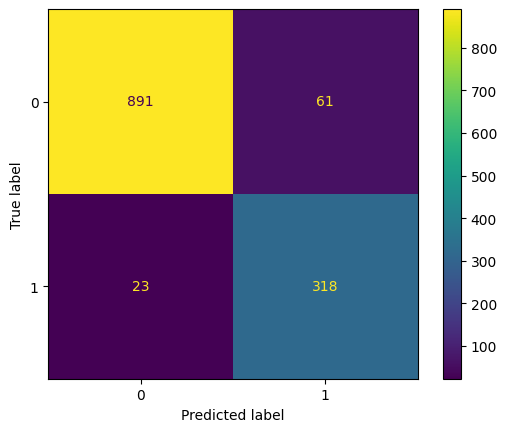

In [32]:
ConfusionMatrixDisplay(cm).plot();

In [34]:
# Accuracy
(891+318)/(891+318+61+23) # TP+TN / (TP+TN+FP+FN)

0.9350348027842227

In [37]:
# Precision
318/(61+318) # TP / (TP+FP)

0.8390501319261213

In [38]:
# Precision from Sklearn
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8390501319261213

In [40]:
# Recall
318/(318+23) # TP / (TP+FN)

0.9325513196480938

In [41]:
# Recall from Sklearn
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9325513196480938

In [42]:
# F1 Score -> 2.(P*R)/(P+R)
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8833333333333333